In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

import numpy as np

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200609_GNIRS.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200609_GNIRS

## Ca II IRT

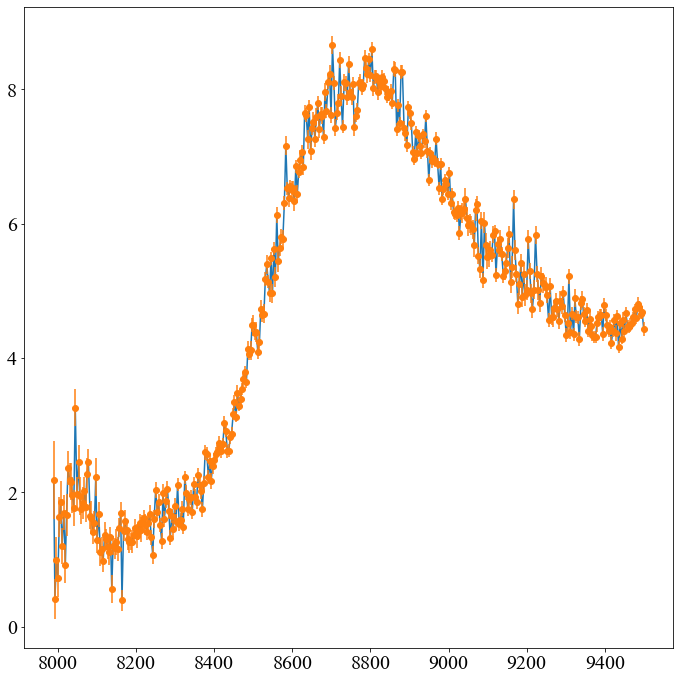

In [4]:
Spec1.plot_line_region(7400, 9500)

## He I 10830

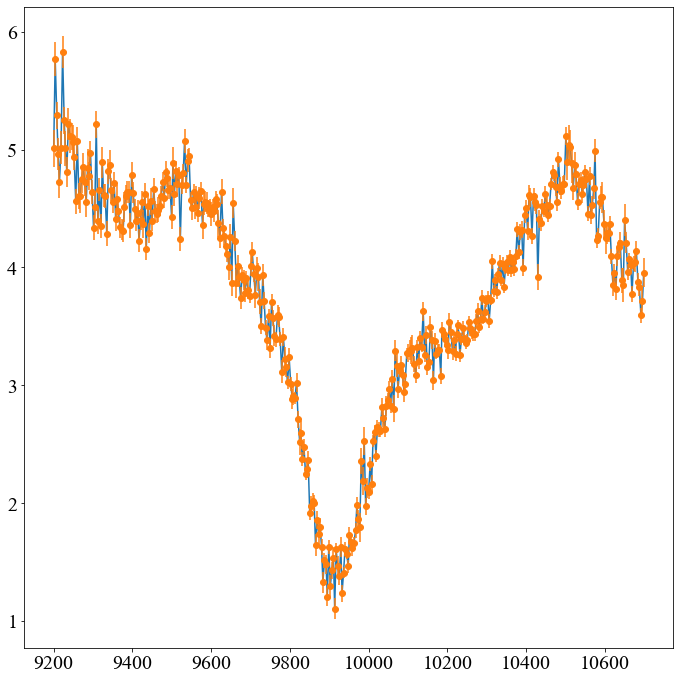

In [3]:
Spec1.plot_line_region(9200, 10700)

In [180]:
Spec1.add_line('HeI_10830', 9500, 10500, lines=[[10830]], rel_strength=[[]])
Spec1.add_line('HeI_10830/FeII',
               9000,
               10500,
               lines=[[10830], [9998, 10500, 10863]],
               rel_strength=[[], [0.0382, 0.0239, 0.0172]])
Spec1.add_line('HeI_10830/HeI_10830',
               9500,
               10500,
               lines=[[10830], [10830]],
               rel_strength=[[1], [1]])

267 points within 9500.00 and 10500.00 angstroms.
401 points within 9000.00 and 10500.00 angstroms.
267 points within 9500.00 and 10500.00 angstroms.


## He hvf + Fe II pvf

### Single Fe II line (10500)

294 points within 9400.00 and 10500.00 angstroms.


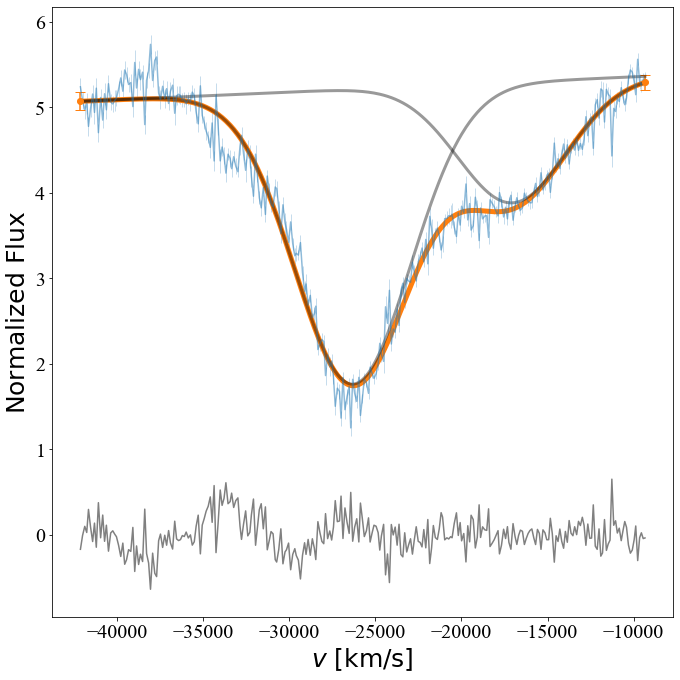

LS estimation:
Velocity 1: -26302 km/s
Velocity 2: -7787 km/s


In [162]:
Spec1.add_line('HeI_10830/FeII0',
               9400,
               10500,
               lines=[[10830], [10500]],
               rel_strength=[[], []])
Spec1.line['HeI_10830/FeII0'].LS_estimator(guess=(5, 5, -28000, 15, -2000, -8000, 14, -2000))

Normalize factor = 2.271


100%|██████████████████████████████████████| 3000/3000 [00:27<00:00, 108.94it/s]


MCMC results:
Velocity 1: -26307 pm 53 km/s
Velocity 2: -7792 pm 129 km/s
Normalize factor = 2.271


 10%|███▋                                 | 5000/50000 [00:45<06:51, 109.37it/s]

MCMC results:
Velocity 1: -26297 pm 49 km/s
Velocity 2: -7769 pm 118 km/s


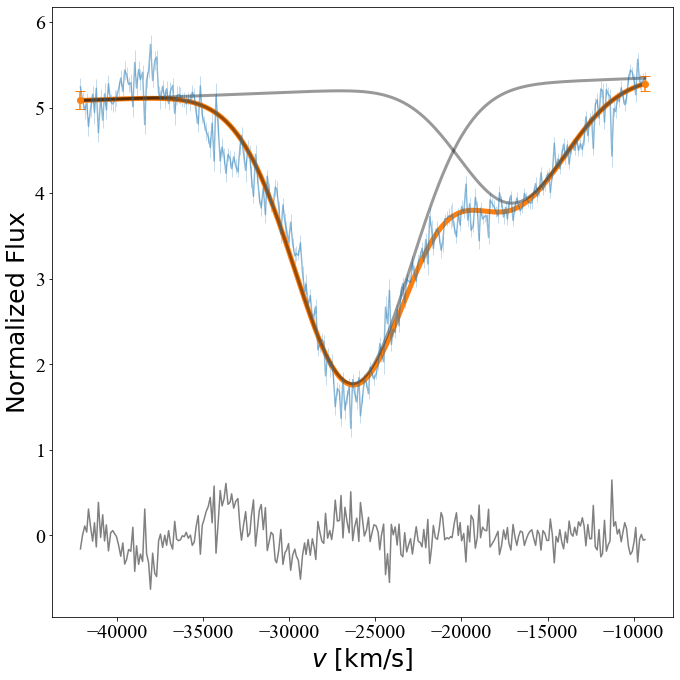

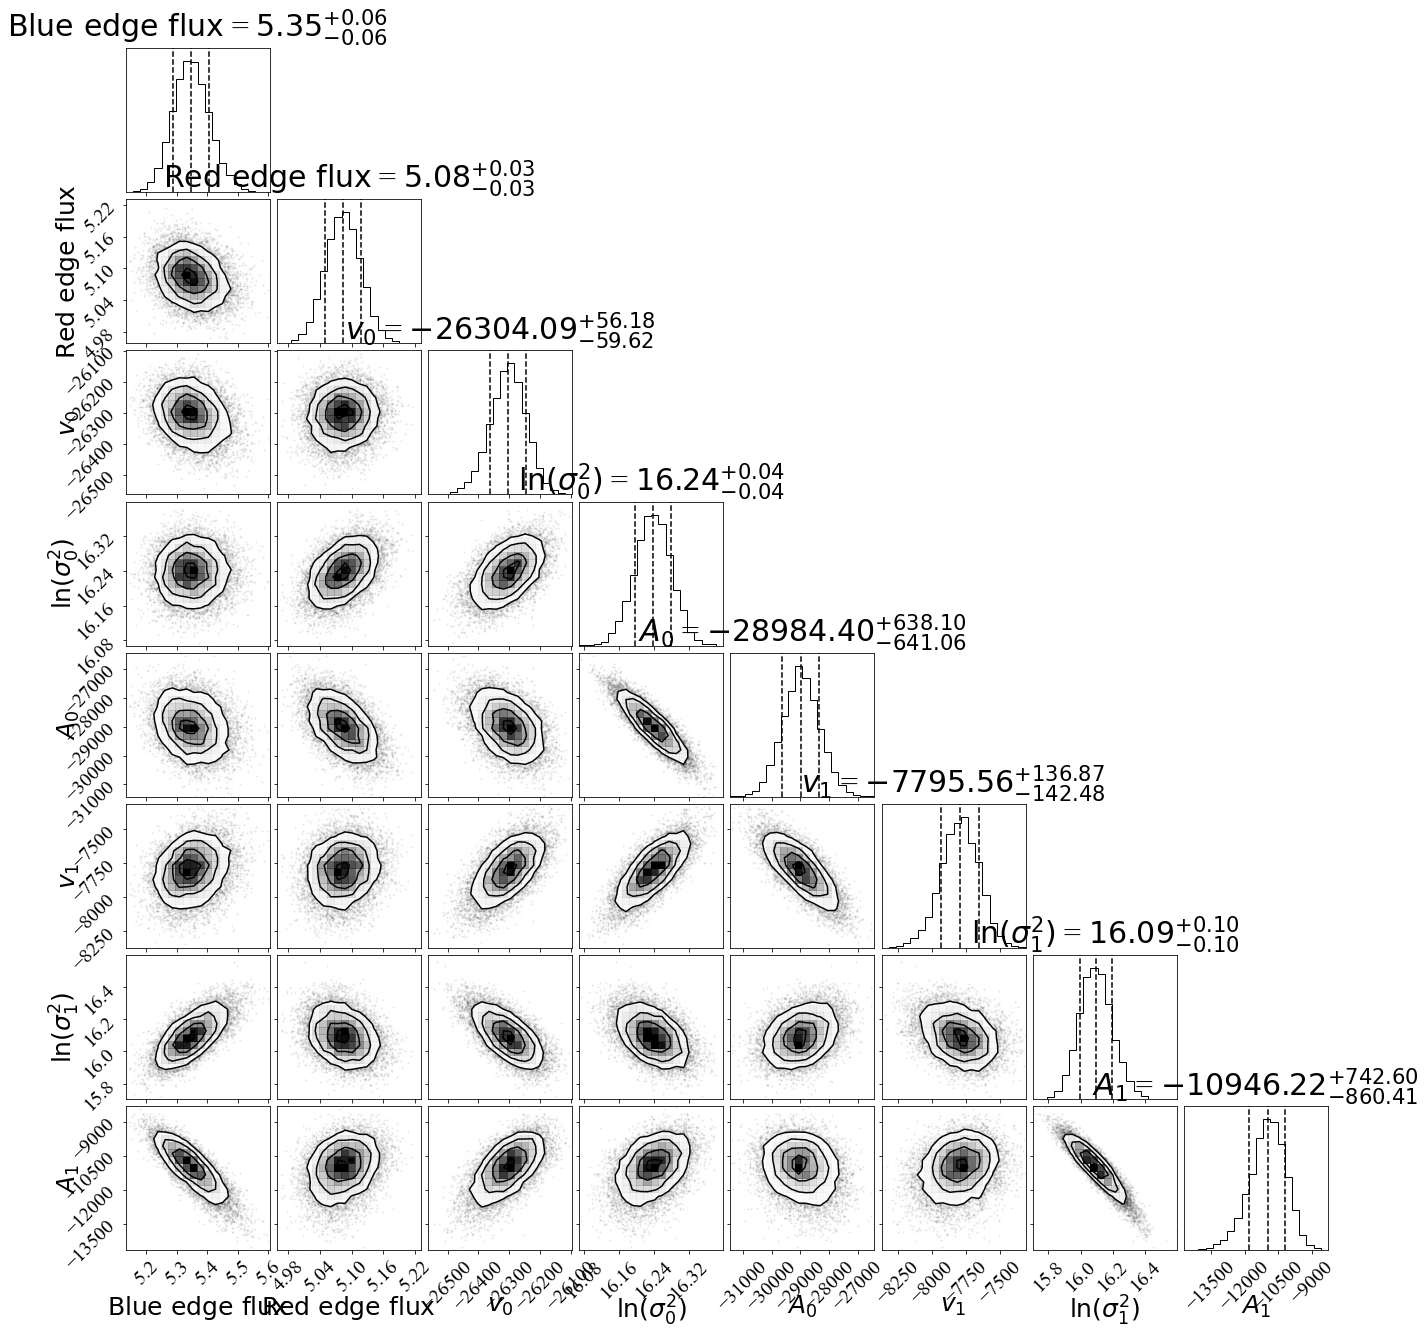

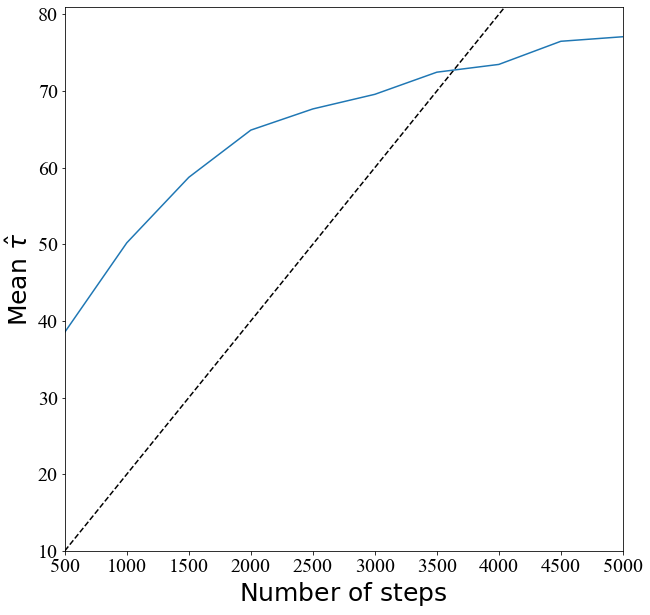

In [174]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII0'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    var_max=1e10,
    initial=[1, 1, -26000, 16, -5000, -8000, 16, -5000],
    normalize_unc=True,
    max_nsteps=3000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/FeII0'].MCMC_sampler(
    mu_prior=[-26000, -8000],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/FeII0'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)

### Multiple Fe II lines

-7795
Normalize factor = 3.637


100%|███████████████████████████████████████| 1000/1000 [00:13<00:00, 72.09it/s]


MCMC results:
Velocity 1: -26429 pm 288 km/s
Velocity 2: -19722 pm 6711 km/s


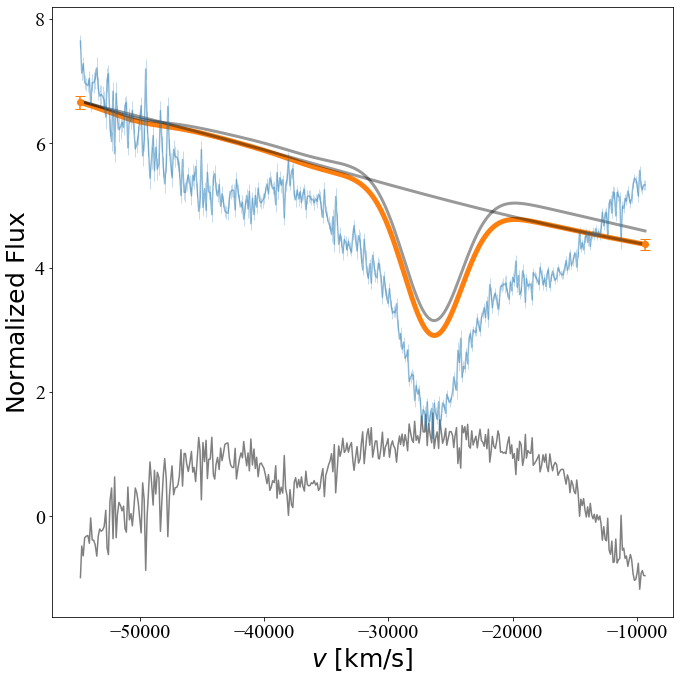

Normalize factor = 3.637


  0%|                                                 | 0/50000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  1%|▎                                      | 351/50000 [00:04<11:10, 74.08it/s]Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/Users/chang/Desktop/SNIa/SN2020jgb/rv/SN2020jgb/../absorption_line_vel.py", line 1013, in ln_prob
    ln_like = lnlike_gaussian_abs(theta=theta, rel_strength=rel_strength, blue_vel=blue_vel, red_vel=red_vel,
  File "/Users/chang/Desktop/SNIa/SN2020jgb/rv/SN2020jgb/../absorption_line_vel.py", line 866, in lnlike_gaussian_abs
    model_flux = flux_gauss(theta_flux, rel_strength,
  File "/Users/chang/Desktop/SNIa/SN2020jgb/rv/SN2020jgb/../absorption_line_vel.py", line 798, in flux_g

emcee: Exception while calling your likelihood function:
  params: [ 7.35511328e+00  5.36906563e+00 -2.64292101e+04  1.54944787e+01
 -1.29537031e+04 -1.97218733e+04  1.93338574e+01 -1.00776581e+04]
  args: (array([0.0382, 0.0239]), -54865.09093104153, -9274.058776834214, array([-54789.2379428 , -54683.02293926, -54564.20751618, -54446.37468272,
       -54326.8796425 , -54190.31050028, -54069.39347578, -53964.10240123,
       -53838.73930864, -53721.98492742, -53601.17619252, -53471.36234037,
       -53354.73370938, -53239.78774918, -53123.64222449, -53005.25854519,
       -52877.11513218, -52748.36853341, -52643.37487929, -52536.56313053,
       -52409.53090087, -52280.86621091, -52164.09993611, -52035.75399957,
       -51913.64096397, -51813.04391194, -51687.87675519, -51561.35623306,
       -51440.95755262, -51316.23697316, -51202.62134633, -51091.31839664,
       -50969.45712088, -50845.68986052, -50716.71674106, -50610.26935665,
       -50502.6941129 , -50372.16804374, -50247.57271

KeyboardInterrupt: 

In [185]:
mu1 = -26304
mu2 = -7795
sampler = Spec1.line['HeI_10830/FeII'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e6],
    var_max=1e10,
    initial=Spec1.line['HeI_10830/FeII0'].theta_MCMC,
    normalize_unc=True,
    max_nsteps=1000,
    Plot_model=True)
sampler = Spec1.line['HeI_10830/FeII'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e6],
    initial=Spec1.line['HeI_10830/FeII'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)

## He I hvf + He I pvf

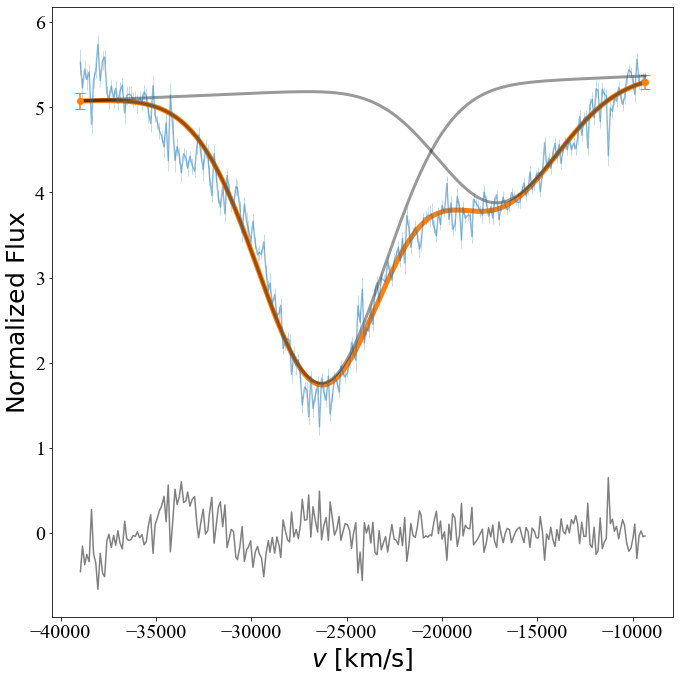

LS estimation:
Velocity 1: -26303 km/s
Velocity 2: -17073 km/s


In [163]:
Spec1.line['HeI_10830/HeI_10830'].LS_estimator(guess=(1, 1, -25000, 15, -2000, -15000, 15, -2000))

Normalize factor = 2.320


100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 111.84it/s]


MCMC results:
Velocity 1: -26309 pm 360 km/s
Velocity 2: -17043 pm 2875 km/s
Normalize factor = 2.320


  8%|██▉                                  | 4000/50000 [00:36<07:04, 108.30it/s]

MCMC results:
Velocity 1: -26297 pm 53 km/s
Velocity 2: -17062 pm 124 km/s


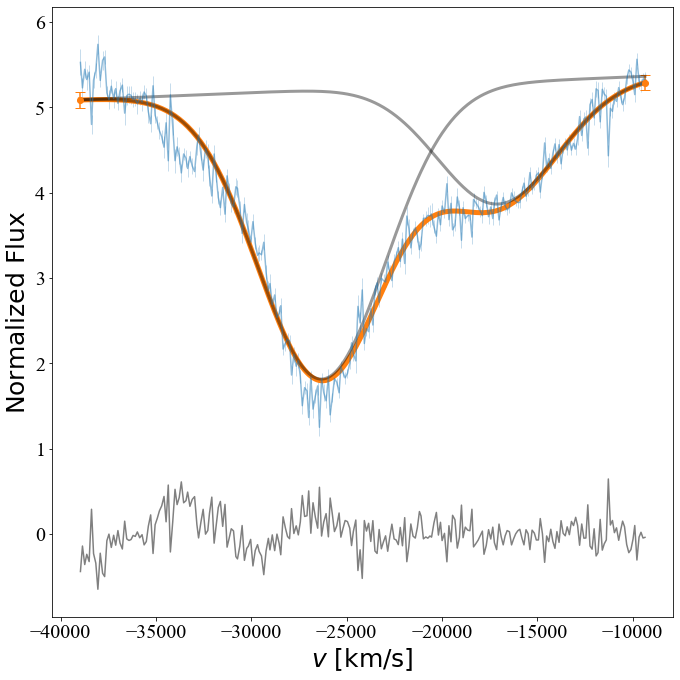

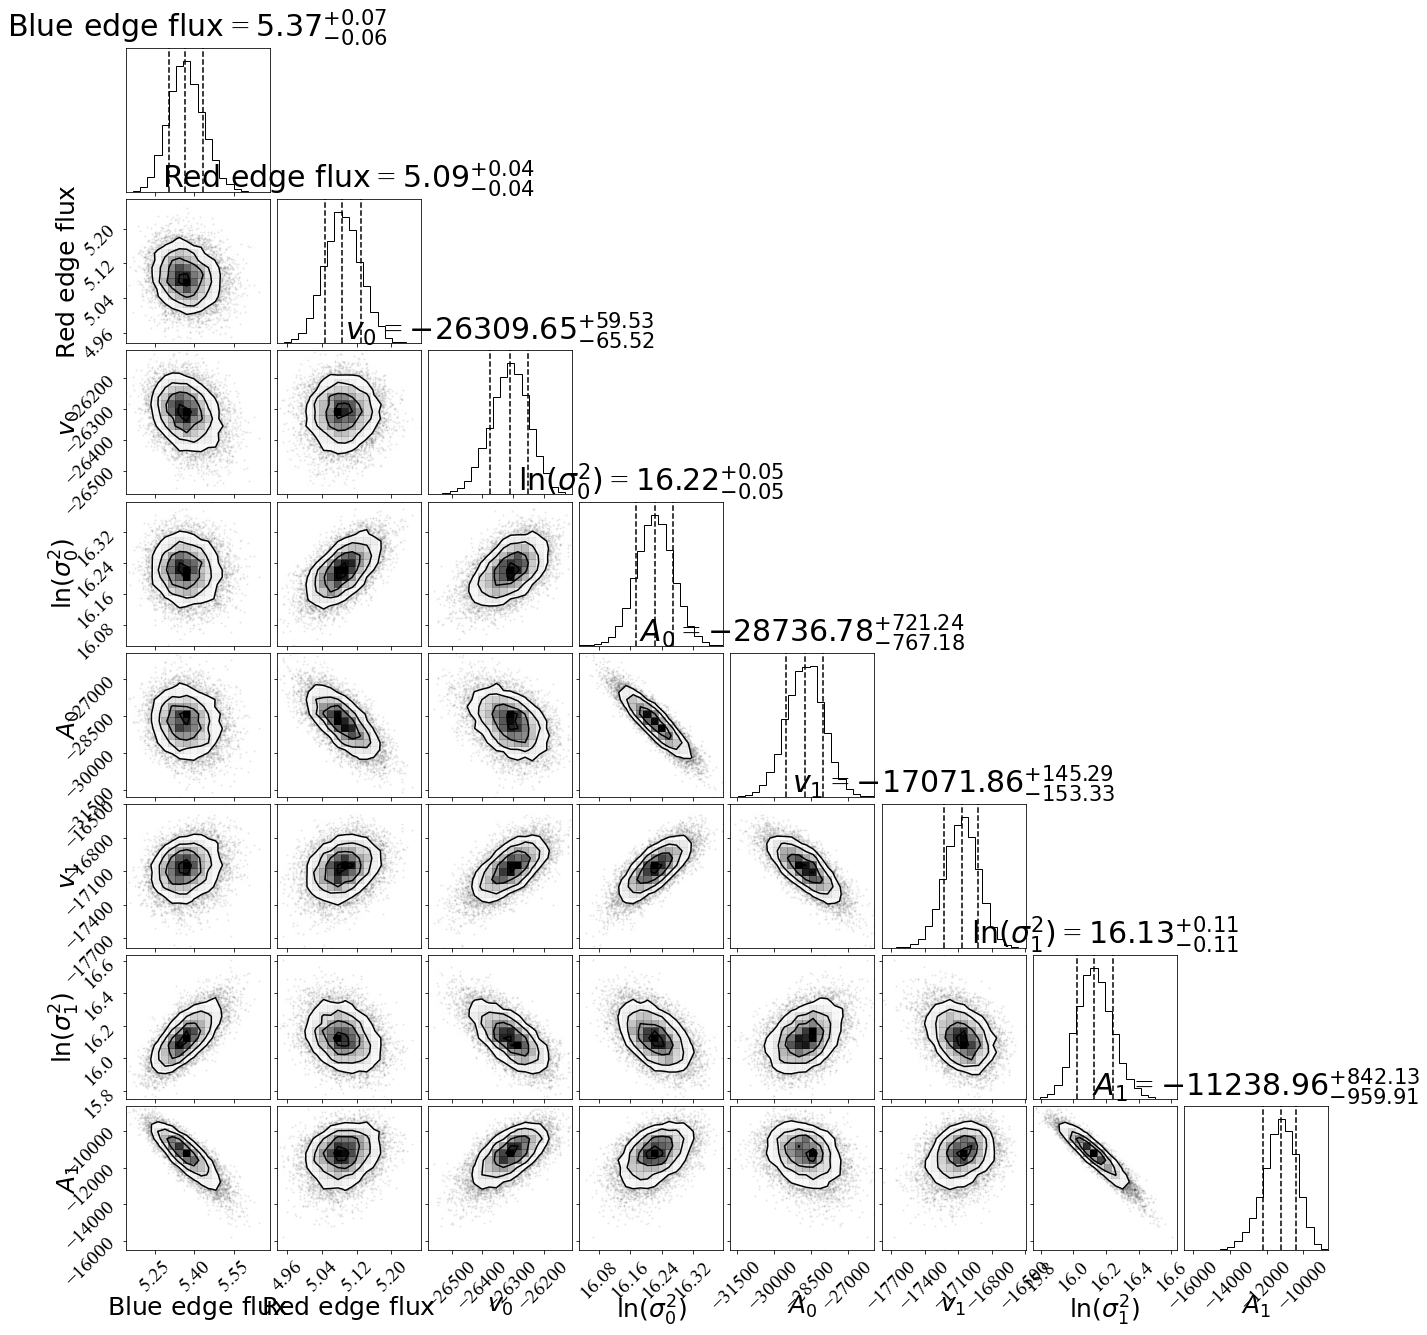

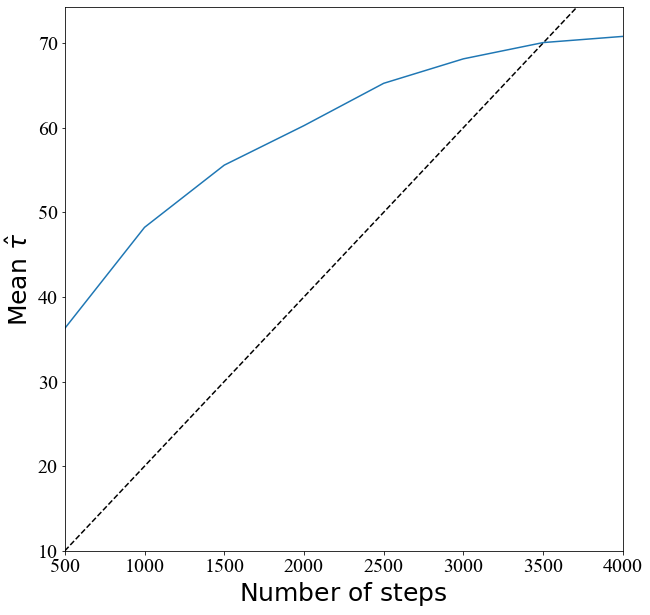

In [176]:
mu1 = -26000
mu2 = -17000
sampler = Spec1.line['HeI_10830/HeI_10830'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    var_max=1e10,
    initial=[1, 1, -26000, 16, -5000, -17000, 16, -5000],
    normalize_unc=True,
    max_nsteps=1000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/HeI_10830'].MCMC_sampler(
    mu_prior=[-26000, -18000],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/HeI_10830'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)

## Mg II 10927

In [73]:
Spec1.add_line('MgII_10927',
               9500,
               10500,
               lines=[[10927], [10927]],
               rel_strength=[[1], [1]])

267 points within 9500.00 and 10500.00 angstroms.


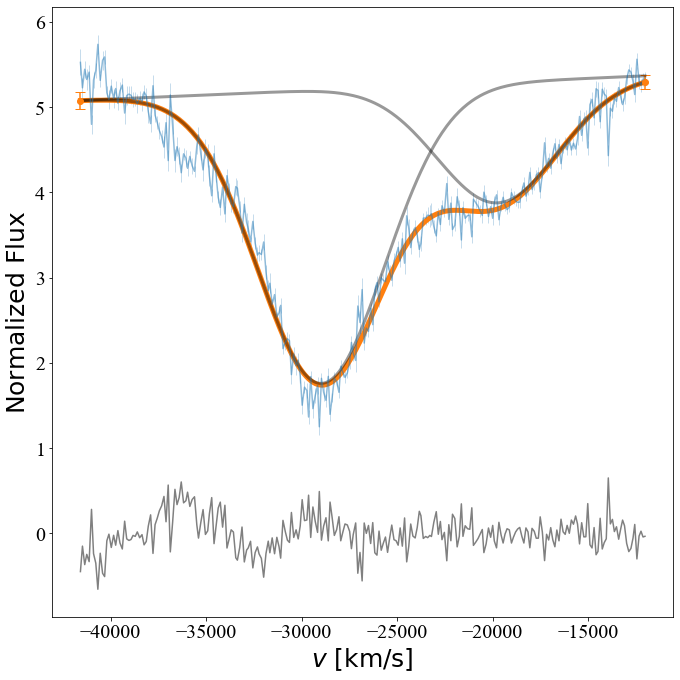

LS estimation:
Velocity 1: -28958 km/s
Velocity 2: -19740 km/s


In [74]:
Spec1.line['MgII_10927'].LS_estimator(guess=(1, 1, -30000, 15, -2000, -25000, 15, -2000))